In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
from math import log10, sqrt
from skimage.util import random_noise
from sklearn.metrics import mean_squared_error as MSE
from skimage.metrics import peak_signal_noise_ratio as PSNR

In [2]:
# Open baboon image from Image folder
img = cv2.imread("Images/baboon.JPG")

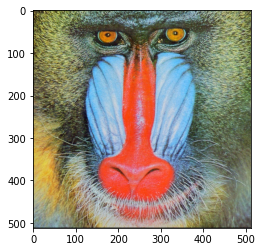

In [3]:
# display the original pic
image_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.show()

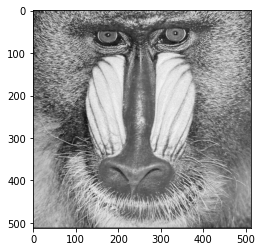

In [4]:
# Convert to grayscale
image_GRAY = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2GRAY)
# display converted image
plt.imshow(image_GRAY, cmap="gray")
plt.show()

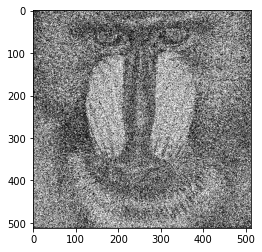

In [5]:
# add guassian noise with scikit library
noisy_image_GRAY = random_noise(image_GRAY, mode="gaussian", mean=0,var=0.25)
plt.imshow(noisy_image_GRAY , cmap="gray")
plt.show()

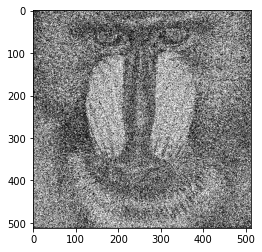

In [6]:
noisy_unit = np.uint8(noisy_image_GRAY * 255)
# Apply NLM filter
nlm_filtered_image = cv2.fastNlMeansDenoising(noisy_unit, h=10, searchWindowSize=21, templateWindowSize=7)

plt.imshow(nlm_filtered_image , cmap="gray")
plt.show()

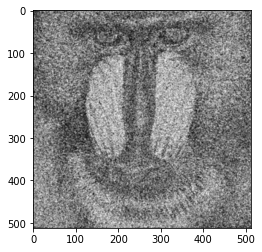

In [7]:
# Apply 3*3 simple mean denoise filter
mean_3_3_filtered_image = cv2.blur(noisy_image_GRAY, (3,3))
plt.imshow(mean_3_3_filtered_image , cmap="gray")
plt.show()

In [8]:
# calling MSE for our converted image
mse = MSE(image_GRAY , nlm_filtered_image)
# display the MSE
print(mse)

106.65922927856445


In [9]:
# calling PSNR for our converted image
psnr = PSNR(image_GRAY , mean_3_3_filtered_image)
# display the PSNR
print(psnr)

5.658278192656545


C:\Users\User\AppData\Local\Temp\ipykernel_14076\769090414.py:2: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = PSNR(image_GRAY , mean_3_3_filtered_image)
